# Income Data and the Log-Normal Distribution

In this problem, we'll try to model data on annual income outcomes using a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). For this problem, I have included synthetic data to represent the annual income of graduating students from UChicago in the year 2018 (not real data) . The data is given in a text file `incomes.txt`. Incomes are reported in U.S. dollars. For this data, use the log-normal distribution, with PDF given by
$$
f(x | \mu, \sigma) = \frac{1}{x \sigma \sqrt{2 \pi}} \exp\left\{-\frac{(\log(x) - \mu)^2}{2 \sigma^2}\right\},
$$
with $0 < x < \infty$, $-\infty < \mu < \infty$, and $\sigma > 0$.


**GRADING:** 2 points for each question

#### Q1. Load Data

Load the data into a Pandas DataFrame called `df`. Give the column a name (let's use `income`).

In [112]:
import numpy as np
import scipy.stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [241]:
np.set_printoptions(suppress=True)

In [7]:
df = pd.read_csv('incomes.txt', header=None)
df.columns = ['income']

In [8]:
df.head()

,income
0,51253.497156
1,100630.320241
2,83009.276137
3,82882.106543
4,77338.294839


#### Q2. Plot a histogram

Plot a histogram and kde (kernel density estimation) plot of the incomes on the same plot. Do this using seaborn's `distplot` function. Be sure to label the x-axis and give the plot a title.

C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Incomes of Graduating Students')

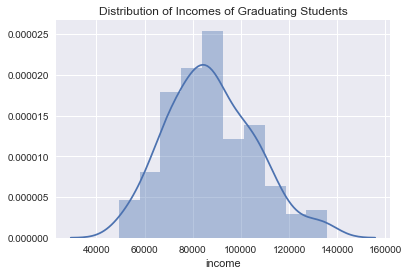

In [9]:
sns.distplot(df)
plt.xlabel('income')
plt.title('Distribution of Incomes of Graduating Students')

#### Q3. Plot the PDF of the log-normal distribution

Plot the PDF of the log-normal distribution $f(x|\mu, \sigma)$ for values $\mu=11.0$ and $\sigma=0.5$ over the range $x \in (0,150,000)$.

Note: The assumption that $\mu=11$ and $\sigma = 0.5$ implies that the mean of the distribution is approx $\$67,846$, since the mean is $\exp\{\mu + 1/2 \cdot \sigma^2\}$.

Hint: I actually don't recommend using the `scipy.stats.lognorm` functions, like `scipy.stats.lognorm.cdf`. The built-in functions for the lognormal distribution in `scipy` use a 3-parameter parameterization that is pretty confusing. You can use them if you like, but I've found that it's easier to write my own.

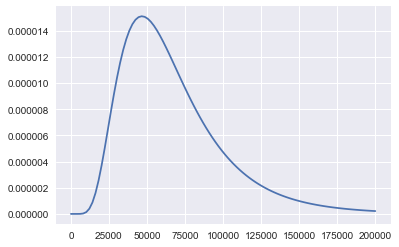

In [239]:
mu = 11.0
sigma = 0.5
def f(x, mu=11.0, sigma=0.5):
    val = (1/(x * sigma * np.sqrt(2 * np.pi)) * 
           np.exp(-(np.log(x) - mu)**2/(2 * sigma**2)))
    return val

X = np.linspace(0.0001, 200_000, 100)
Y = f(X, mu=mu, sigma=sigma)
plt.plot(X, Y);

In [257]:
def log_norm_mean(mu=11, sigma=.5):
    return np.exp(mu + .5 * sigma**2)
log_norm_mean(mu=11, sigma=.5)

67846.29106328034

In [245]:
import scipy.integrate
q = lambda x: x * f(x)
mean, _ = scipy.integrate.quad(q, .001, 100_000_000)
mean

67846.29106328035

#### Q4. Plot the PDF over the histogram

Use your plot of the given PDF (with $\mu=11.0$ and $\sigma=0.5$) and plot it over the histogram of the incomes data. Does our PDF appear match the data well?

Hint: Use `sns.distplot(df.incomes, kde=False, norm_hist=True)`, then add your plot. Try the same thing with `norm_hist=False` to see why we need this keyword argument to do what we want to do.

C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


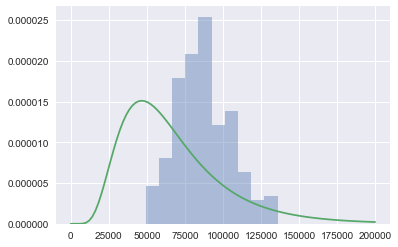

In [246]:
# The PDF doesn't really match the data.
sns.distplot(df, kde=False, norm_hist=True)
plt.plot(X, Y);

#### Q5. Write a function for the log-likelihood function.

Write a function for the log-likelihood function. Compute the log-likelihood of the distribution $\mu=11.0$ and $\sigma=0.5$.

In [247]:
def loglik(params, data):
    """Compute log-likelihood of parameters
    
    data should be provided in `args`. 
    The data should be a pandas.Series or a numpy array
    """
    mu, sigma = params
    f = lambda x: (1/(x * np.abs(sigma) * np.sqrt(2 * np.pi)) * 
                   np.exp(-(np.log(x) - mu)**2/(2 * sigma**2)))
    f_array = f(data)
    ll = np.sum(np.log(f_array))
    return ll

def nloglik(params, data):
    return -loglik(params, data)

In [248]:
loglik((mu, sigma), df.income.values)

-2385.856997808558

#### Q6. Compute the maximum likelihood estimate for the data.

Compute the maximum likelihood estimate for the data. Plot the pdf of the estimated parameters over a histogram of the data.

In [249]:
import scipy.optimize as opt
params_init = (mu, sigma)
results = opt.minimize(nloglik, params_init, args=(df.income))

In [250]:
results

      fun: 2241.7193013573587
 hess_inv: array([[0.00022116, 0.00000216],
       [0.00000216, 0.0001094 ]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 10
     njev: 17
   status: 0
  success: True
        x: array([11.359023  ,  0.20817732])

C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


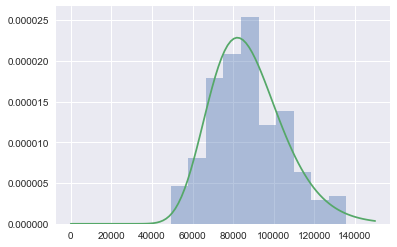

In [251]:
mu_MLE = results.x[0]
sigma_MLE = results.x[1]
X = np.linspace(0.0001, 150_000, 100)
Y = f(X, mu=mu_MLE, sigma=sigma_MLE)
sns.distplot(df, kde=False, norm_hist=True)
plt.plot(X, Y);

#### Q7. What is the variance-covaraince estimate of the parameter estimate $\hat \theta$ ?

Let $\theta = \begin{bmatrix} \mu & \sigma \end{bmatrix}^\intercal$. What is the variance-covariance matrix of these parameters? What is the standard error of $\hat \mu$ and $\hat \sigma$?

In [252]:
np.set_printoptions(suppress=True)

In [253]:
# Note that here we are using our simulated data again
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ')
print(vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) = 
[[ 0.00022116 -0.00000216]
 [-0.00000216  0.0001094 ]]
Standard error for mu estimate =  0.014871316213559298
Standard error for sigma estimate =  0.010459591725469746


#### Q8. Compute a back-of-the envelope calculation of the 95% confidence interval.

Follow the procedure used in the notes.

In [67]:
lb_mu_95pctci = mu_MLE - 2 * stderr_mu_mle
ub_mu_95pctci = mu_MLE + 2 * stderr_mu_mle
print(f'mu_MLE={mu_MLE:.2f}')
print(f'95% conf. int.= [{lb_mu_95pctci:.2f}, {ub_mu_95pctci:.2f}]')

lb_sig_95pctci = sigma_MLE - 2 * stderr_sig_mle
ub_sig_95pctci = sigma_MLE + 2 * stderr_sig_mle
print('sig_MLE={sigma_MLE:.2f}')
print(f'95% conf. int.= [{lb_sig_95pctci:.2f}, {ub_sig_95pctci:.2f}]')

mu_MLE=11.36
95% conf. int.= [11.33, 11.39]
sig_MLE={sigma_MLE:.2f}
95% conf. int.= [0.19, 0.23]


#### Q9. Perform of likelihood ratio test

Perform of likelihood ratio test to test the hypothesis that $\mu=11.0$ and $\sigma=0.5$ Report the p-value.

In [77]:
import scipy.stats

In [96]:
LR = 2*(loglik((mu_MLE, sigma_MLE), df.income) - loglik((mu, sigma), df.income))
pval_h0 = 1.0 - scipy.stats.chi2.cdf(LR, 2)
pval_h0

0.0

#### Q9. Perform of likelihood ratio test again

Perform of likelihood ratio test to test the hypothesis that $\mu=11.33$ and $\sigma=0.2$ Report the p-value.

In [258]:
log_norm_mean(mu=11.33, sigma=0.2)

84965.45150791103

In [99]:
LR = 2*(loglik((mu_MLE, sigma_MLE), df.income) - loglik((11.33, .2), df.income))
pval_h0 = 1.0 - scipy.stats.chi2.cdf(LR, 2)
pval_h0

0.08753130433222178

#### Q10. Using the parameters you estimated, what is the probability... ?

Using the parameters you estimated, what is the probability that a graduating student will earn more that \$100,000? What is the probability that a student will earn less that \$75,000?

Hint: I actually don't recommend using the `scipy.stats.lognorm` functions, like `scipy.stats.lognorm.cdf`. The built-in functions for the lognormal distribution in `scipy` use a 3-parameter parameterization that is pretty confusing. You can use them if you like, but I've found that it's easier to write my own. This involves using `scipy.integrate.quad` to numerically integrate the pdf that I wrote myself.

In [259]:
import scipy.integrate

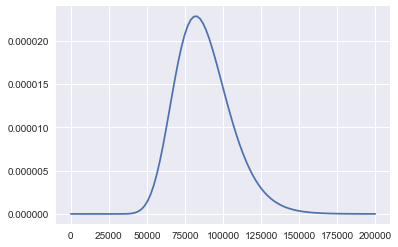

In [266]:
X = np.linspace(1, 200_000, 100)
plt.plot(X, f(X, mu=mu_MLE, sigma=sigma_MLE));

In [267]:
log_norm_mean(mu=mu_MLE, sigma=sigma_MLE)

87613.63349140417

In [297]:
q = lambda x: f(x, mu=mu_MLE, sigma=sigma_MLE)
prob_less_75k, _ = scipy.integrate.quad(q, 0.001, 75_000)
prob_more_100k, _ = scipy.integrate.quad(q, 100_000, 10_000_000)

In [300]:
print(f'Est. probability of making less than 75k: {prob_less_75k:.3f}')
print(f'Est. probability of making more than 100k: {prob_more_100k:.3f}')

Est. probability of making less than 75k: 0.260
Est. probability of making more than 100k: 0.230


# Linear Regression and MLE

In this part of the exercise, we will use MLE to estimate the parameters of a simple linear regression model. We will then compare our estimates to the OLS estimates.

Assume the following linear regression model for exploring the statistical  relationship between the duration of being ill a number of possible variables that might influence that duration. Let $sick_i$ be the number of weeks that individual is sick during the year,
$$
sick_i = \beta_0 + \beta_1 age_i + \beta_2 children_i + \beta temp\_winter_i + \epsilon_i,
$$
where $\epsilon_i \sim \mathcal N(0, \sigma^2)$.
The parameters $(\beta_0, \beta_1, \beta_2, \beta_3, \sigma^2)$ are the parameters of the model that we want to estimate. The variable $age_i$ gives the age of individual $i$ at the end of the calendar year 2016. The variable $temp\_winter_i$ is the average temperature during the months of January, February, and December of 2016 for individual $i$. The data for this model are in the file `sick.txt`, which contains comma-separated values of 200 individuals for four variables $(sick_i, age_i, children_i, temp\_winter_i)$ with variable labels in the first row.


#### Q11. Estimate the parameters...

Estimate the parameters of the model $(\beta_0, \beta_1, \beta_2, \beta_3, \sigma^2)$ by maximum likelihood. Report your estimates, the value of the log-likelihood function, and the estimated variance-covariance matrix of the estimates.

Hint: Solve the linear regression equation for $\epsilon_i$ and use the information about how $\epsilon_i$ is distributed.

In [596]:
df = pd.read_csv('sick.txt')
sick = df.sick.values
age = df.age.values
children = df.children.values
temp = df.avgtemp_winter.values

In [597]:
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [598]:
# np.random.seed(1)
# N = 50
# X = scipy.random.multivariate_normal([35, 1, 35], np.array([[10, 1, 0],
#                                                         [1, 2, 0],
#                                                         [0, 0, 20]]),
#                                 size=N, check_valid='raise')
# df = pd.DataFrame(X, columns=['age', 'children', 'avgtemp_winter'])
# df.age = np.ceil(df.age).astype(int)
# df.children = np.floor(df.children).astype(int)
# df.loc[df.children < 0, 'children'] = 0

# eps_sig = 4
# eps = np.random.normal(0, eps_sig, size=N)
# b0, b1, b2, b3 = 0, 0, .001, -.01
# df['sick'] = b0 + b1 * df.age + b2 * df.children + b3 * df.avgtemp_winter + eps
# df.sick = np.floor(df.sick).astype(int)
# df.loc[df.sick < 0, 'sick'] = 0
# df.loc[df.sick > 50, 'sick'] = 50


# sick = df.sick.values
# age = df.age.values
# children = df.children.values
# temp = df.avgtemp_winter.values

In [599]:
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [600]:
df.describe()

,sick,age,children,avgtemp_winter
count,200.000000,200.000000,200.000000,200.000000
mean,1.008600,40.683850,1.674950,44.041250
std,0.504222,11.268686,0.969761,11.101977
min,0.040000,12.810000,0.000000,16.500000
25%,0.650000,33.967500,0.970000,36.112500
50%,0.960000,41.015000,1.560000,43.300000
75%,1.322500,47.750000,2.322500,52.172500
max,2.800000,74.890000,4.960000,68.600000


In [601]:

# Get a pdf of normal function
def norm_pdf(xvals, mu=0, sigma=1):
    pdf_vals = (1/ (sigma * np.sqrt(2 * np.pi)) * 
                np.exp( - np.power(xvals - mu, 2) / (2 * np.power(sigma, 2)) ))
    return pdf_vals


# get a log likelihood estimation
def log_lik_norm(xvals, mu=0, sigma=1):
    pdf_vals = norm_pdf(xvals, mu, sigma)
    return np.sum(np.log(pdf_vals))


# get  a log likelihood for a regression using certain parameters and 
# certain data
def neg_log_lik_reg(params, *data):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    sick, age, children, temp = data
    xvals = sick - beta_0 - beta_1 * age - beta_2 * children - beta_3 * temp
    log_lik_val = log_lik_norm(xvals, mu=0, sigma=sigma)
    return -log_lik_val

beta_0_init = 0
beta_1_init  = 0
beta_2_init  = 0
beta_3_init  = 0
sigma_init = 1
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, 
                        beta_3_init, sigma_init])
mle_args = sick, age, children, temp
results = opt.minimize(neg_log_lik_reg, params_init, args=(mle_args))
print('The parameter from beta_0 to sigma is: ', results.x )
print('MLE_Log-likelihood: ', -results.fun)

OffDiagNeg = (-np.ones(results.hess_inv.shape) + 
              np.eye(results.hess_inv.shape[0])*2)
vcv_mle = np.array(results.hess_inv)* OffDiagNeg 
print('Variance CoVariance Matrix (MLE) = ')
print(vcv_mle)

The parameter from beta_0 to sigma is:  [ 0.25164674  0.01293338  0.4005018  -0.00999169  0.00301773]
MLE_Log-likelihood:  876.8650464776849
Variance CoVariance Matrix (MLE) = 
[[ 0.0000009  -0.00000001  0.0000002   0.00000002 -0.        ]
 [-0.00000001  0.          0.00000003  0.          0.        ]
 [ 0.0000002   0.00000003  0.00000035 -0.00000002  0.        ]
 [ 0.00000002  0.         -0.00000002  0.          0.        ]
 [-0.          0.          0.          0.          0.00000002]]


C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


#### Q12. Use the likelihood ratio test...

Use the likelihood ratio test to test the hypothesis that $\beta_0 = 1.0$, $\sigma^2 = 0.01$ and $\beta_1, \beta_2, \beta_3 = 0$. Report the p-value.

In [602]:
results.fun

-876.8650464776849

In [603]:
neg_log_lik_reg([0, 0, 0, 0, 1], sick, age, children, temp)

310.81200664093456

In [604]:
results.x

array([ 0.25164674,  0.01293338,  0.4005018 , -0.00999169,  0.00301773])

In [605]:
neg_log_lik_reg([0, 0, 0, 0, 1], sick, age, children, temp)

310.81200664093456

In [606]:
log_lik_h0 = neg_log_lik_reg([0, 0, 0, 0, 1], sick, age, children, temp)
# log_lik_h0 = -neg_log_lik_reg(results.x, sick, age, children, temp)
log_lik_mle = -results.fun
LR_val = 2 * (log_lik_h0 - log_lik_mle )
pval_h0 = 1.0 - scipy.stats.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  1.0


In [607]:
pval_h0

1.0

In [608]:
log_lik_h0

310.81200664093456

In [609]:
log_lik_mle

876.8650464776849

In [610]:
LR_val

-1132.1060796735007

In [611]:
scipy.stats.chi2.cdf(LR_val, 5)

0.0

#### Q13. Compute OLS


In [612]:
import statsmodels.formula.api as smf

In [613]:
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [614]:
results_ols = smf.ols('sick ~ age + children + avgtemp_winter', data=df).fit()

In [615]:
results_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sick   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.815e+06
Date:                Sat, 05 May 2018   Prob (F-statistic):               0.00
Time:                        02:37:01   Log-Likelihood:                 876.87
No. Observations:                 200   AIC:                            -1746.
Df Residuals:                     196   BIC:                            -1733.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2516      0.001    254.032      0.000       0.250       0.254
age                0.0129   6.49e-05    199.257      0.000       0.013       0.013
children           0.4005      0.001    643.790      0.000       0.399       0.402
avgtemp_winter    -0.0100   4.51e-05   -221.388      0.000      -0.010      -0.010
==============================================================================
Omnibus:                       24.095   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.115
Skew:                          -0.002   Prob(JB):                       0.0285
Kurtosis:                       2.076   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [616]:
results.x

array([ 0.25164674,  0.01293338,  0.4005018 , -0.00999169,  0.00301773])

In [617]:
log_lik_h0 = -neg_log_lik_reg([0.25, 0.01, 0.4, -0.01, 0.01], sick, age, children, temp)
# log_lik_mle = results.fun
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - scipy.stats.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [595]:
results_ols.resid.std()

0.003025261777392904